In [2]:
import pandas as pd

from SMILESX import embeddingvis, token, interpret
%matplotlib inline



Device mapping:
/job:localhost/replica:0/task:0/device:XLA_CPU:0 -> device: XLA_CPU device



RDKit WARNING: [16:31:58] Enabling RDKit 2019.09.3 jupyter extensions


#### Definition of data

In [3]:
validation_data_dir = "./validation_data/"

In [4]:
extension = '.csv'

In [5]:
data_name = 'FreeSolv' # FreeSolv, ESOL, Lipophilicity
prop_tag = ''

In [6]:
if data_name == 'FreeSolv':
    data_filename = 'FreeSolv_SAMPL'
    prop_tag = 'expt'
elif data_name == 'ESOL':
    data_filename = 'ESOL_delaney-processed'
    prop_tag = 'measured log solubility in mols per litre'
elif data_name == 'Lipophilicity':
    data_filename = 'Lipophilicity'
    prop_tag = 'exp'
else:
    data_filename = data_name
    prop_tag = prop_tag

In [7]:
sol_data = pd.read_csv(validation_data_dir+data_filename+extension)

In [8]:
sol_data.head(3)

,Unnamed: 0,iupac,smiles,expt,calc
0,0,"4-methoxy-N,N-dimethyl-benzamide",COc1ccc(C(=O)N(C)C)cc1,-11.01,-9.625
1,1,methanesulfonyl chloride,CS(=O)(=O)Cl,-4.87,-6.219
2,2,3-methylbut-1-ene,C=CC(C)C,1.83,2.452


In [9]:
sol_data = sol_data[['smiles',prop_tag]]

In [10]:
sol_data.head()

,smiles,expt
0,COc1ccc(C(=O)N(C)C)cc1,-11.01
1,CS(=O)(=O)Cl,-4.87
2,C=CC(C)C,1.83
3,CCc1cnccn1,-5.45
4,CCCCCCCO,-4.21


In [11]:
sol_data.shape

(642, 2)

#### Embedding Visualization

***SMILES_X for embedding visualization starts...***


******
***Fold #0 initiated...***
******
***Sampling and splitting of the dataset.***

Scaler: RobustScaler(copy=True, quantile_range=(5.0, 95.0), with_centering=True,
             with_scaling=True)
Train/valid/test splits: 0.80/0.10/0.10


***Data augmentation.***

Enumerated SMILES:
	Training set: 4352
	Validation set: 474
	Test set: 529

***Tokenization of SMILES.***

Examples of tokenized SMILES from a training set:
[[' ', 'C', '=', 'C', 'C', 'C', ' '], [' ', 'C', '(', 'C', 'C', ')', '=', 'C', ' '], [' ', 'C', '(', 'C', ')', 'C', '=', 'C', ' '], [' ', 'C', 'C', 'C', '=', 'C', ' '], [' ', 'c', '1', 'c', 'c', 'c', '2', 'n', 'c', 'c', 'c', 'c', '2', 'c', '1', ' ']]

['[S+2]', 'O', '/', '=', '3', '(', '2', 'Br', 'I', ' ', 'F', 'S', 's', 'c', '[C@@]', '4', ')', '[nH]', '[C@]', 'n', '[O-]', '[C@@H]', 'P', '[N+]', '5', '\\', 'Cl', 'C', '#', 'N', '-', '1', '[C@H]']
Number of tokens only present in a training set: 33

Full vocabulary: 

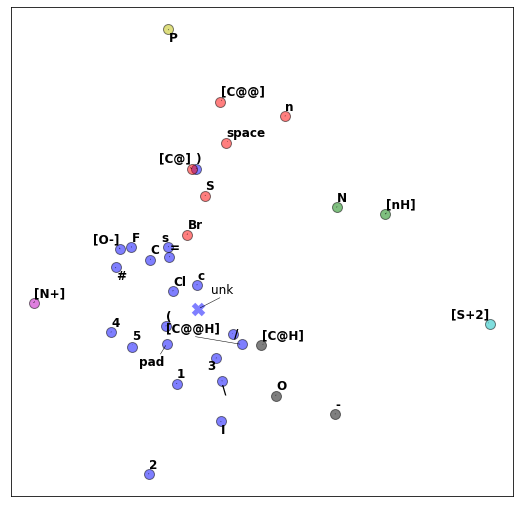

In [12]:
embeddingvis.Embedding_Vis(data=sol_data, 
                          data_name=data_name, 
                          data_units='', 
                          k_fold_number = 1,
                          k_fold_index = 0,
                          augmentation = True, 
                          outdir = "./data/", 
                          affinity_propn = True)

#### Find tokens in SMILES

In [13]:
token.TokensFinder(data=sol_data, 
                   data_name=data_name, 
                   data_units='', 
                   k_fold_number = 1,
                   k_fold_index = 0,
                   augmentation = True, 
                   token_tofind = '[nH]', 
                   verbose = 0)

***SMILES_X token's finder starts...***


******
***Fold #0 initiated...***
******
***Sampling and splitting of the dataset.***

Scaler: RobustScaler(copy=True, quantile_range=(5.0, 95.0), with_centering=True,
             with_scaling=True)
Train/valid/test splits: 0.80/0.10/0.10


***Data augmentation.***

Enumerated SMILES:
	Training set: 4352
	Validation set: 474
	Test set: 529

***Tokenization of SMILES.***

Examples of tokenized SMILES from a training set:
[[' ', 'C', '=', 'C', 'C', 'C', ' '], [' ', 'C', '(', 'C', 'C', ')', '=', 'C', ' '], [' ', 'C', '(', 'C', ')', 'C', '=', 'C', ' '], [' ', 'C', 'C', 'C', '=', 'C', ' '], [' ', 'c', '1', 'c', 'c', 'c', '2', 'n', 'c', 'c', 'c', 'c', '2', 'c', '1', ' ']]

The finder is processing the search...

96 SMILES found with [nH] token in the training set.


#### SMILES inference interpretation

***SMILES_X Interpreter starts...***


******
***Fold #0 initiated...***
******
***Sampling and splitting of the dataset.***

Scaler: RobustScaler(copy=True, quantile_range=(5.0, 95.0), with_centering=True,
             with_scaling=True)
Train/valid/test splits: 0.80/0.10/0.10


***Data augmentation.***

Enumerated SMILES:
	Training set: 4352
	Validation set: 474
	Test set: 529

***Tokenization of SMILES.***

Examples of tokenized SMILES from a training set:
[[' ', 'C', '=', 'C', 'C', 'C', ' '], [' ', 'C', '(', 'C', 'C', ')', '=', 'C', ' '], [' ', 'C', '(', 'C', ')', 'C', '=', 'C', ' '], [' ', 'C', 'C', 'C', '=', 'C', ' '], [' ', 'c', '1', 'c', 'c', 'c', '2', 'n', 'c', 'c', 'c', 'c', '2', 'c', '1', ' ']]

['[S+2]', 'O', '/', '=', '3', '(', '2', 'Br', 'I', ' ', 'F', 'S', 's', 'c', '[C@@]', '4', ')', '[nH]', '[C@]', 'n', '[O-]', '[C@@H]', 'P', '[N+]', '5', '\\', 'Cl', 'C', '#', 'N', '-', '1', '[C@H]']
Number of tokens only present in a training set: 33

Full vocabulary: ['pad', 'unk', '

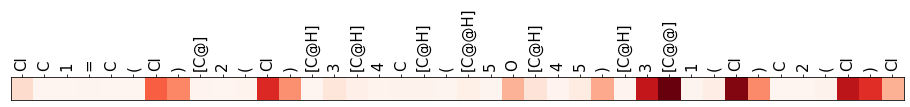

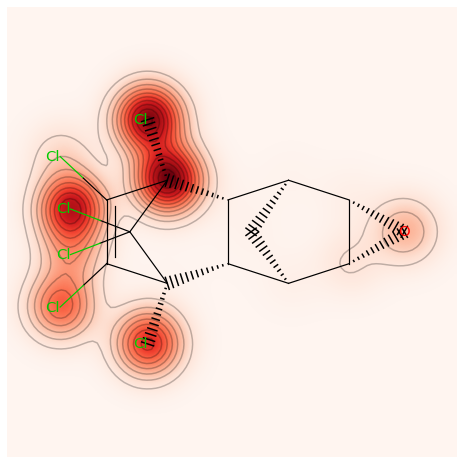

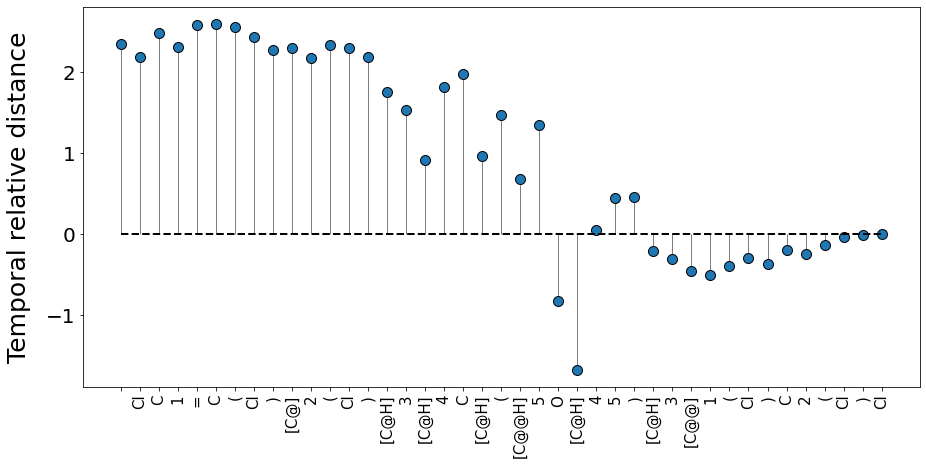

In [14]:
interpret.Interpretation(data=sol_data, 
                         data_name=data_name, 
                         data_units='', 
                         k_fold_number = 1,
                         k_fold_index = 0,
                         augmentation = True, 
                         outdir = "./data/", 
                         smiles_toviz = 'ClC1=C(Cl)[C@]2(Cl)[C@H]3[C@H]4C[C@H]([C@@H]5O[C@@H]54)[C@H]3[C@@]1(Cl)C2(Cl)Cl', 
                         font_size = 15, 
                         font_rotation = 'vertical')